# Exploratory Data Analysis (EDA) and Cleaning | S&P 1000 Companies
---

## Import Library

In [1]:
# Basic library
import pandas as pd

## Load Scraped Data

- Load `edgar_sp500.csv` from `data` folder into a pandas DataFrame
- Check data types for each columns

In [2]:
df = pd.read_csv('../data/edgar_sp1000.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13657692 entries, 0 to 13657691
Data columns (total 5 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   security     object
 1   name         object
 2   value        object
 3   unit_ref     object
 4   context_ref  object
dtypes: object(5)
memory usage: 521.0+ MB


---

## Missing Values

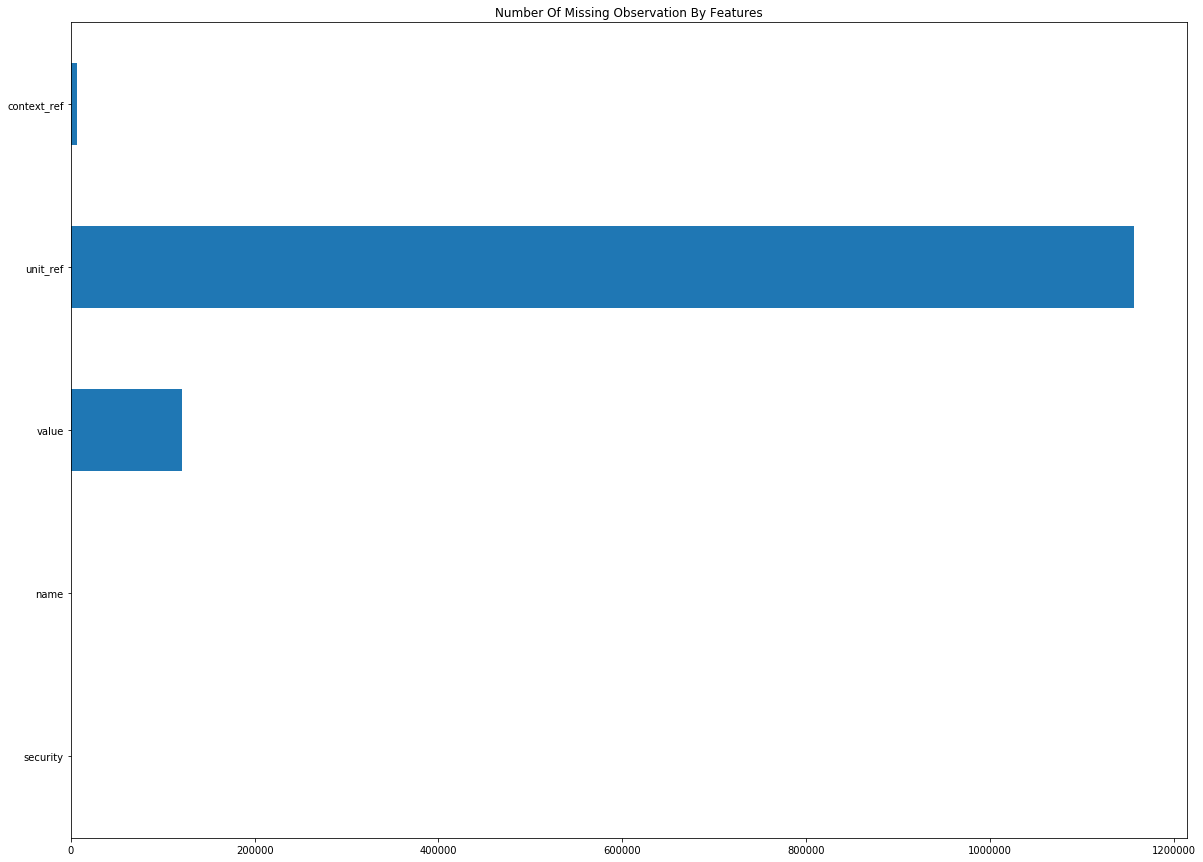

In [3]:
df.isnull().sum().plot.barh(
    figsize=(20, 15), 
    title='Number Of Missing Observation By Features'
);

In [4]:
df = df[df['value'].notnull()]

---

## Plotting And Interpreting Data

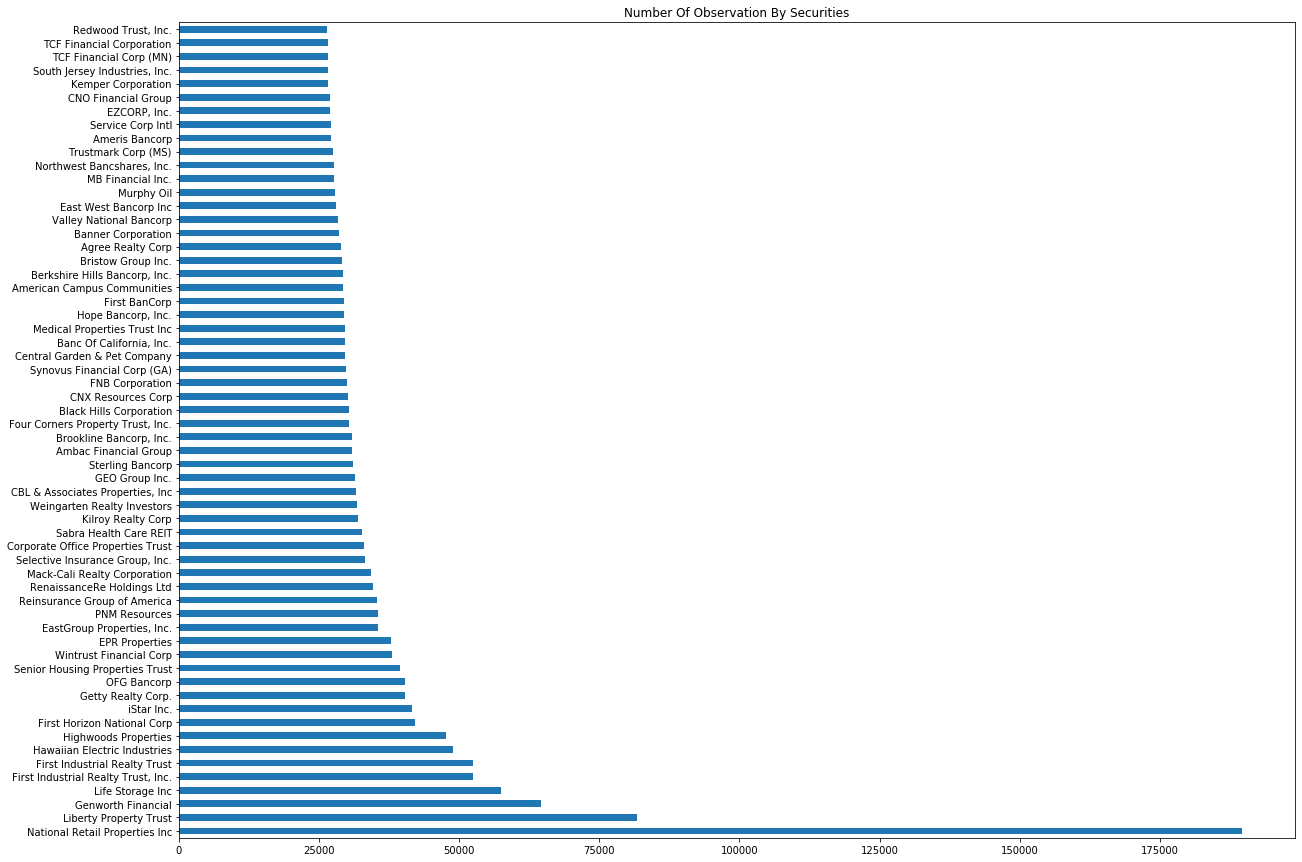

In [5]:
df['security'].value_counts()[:60].plot.barh(
    figsize=(20, 15), 
    title='Number Of Observation By Securities'
);

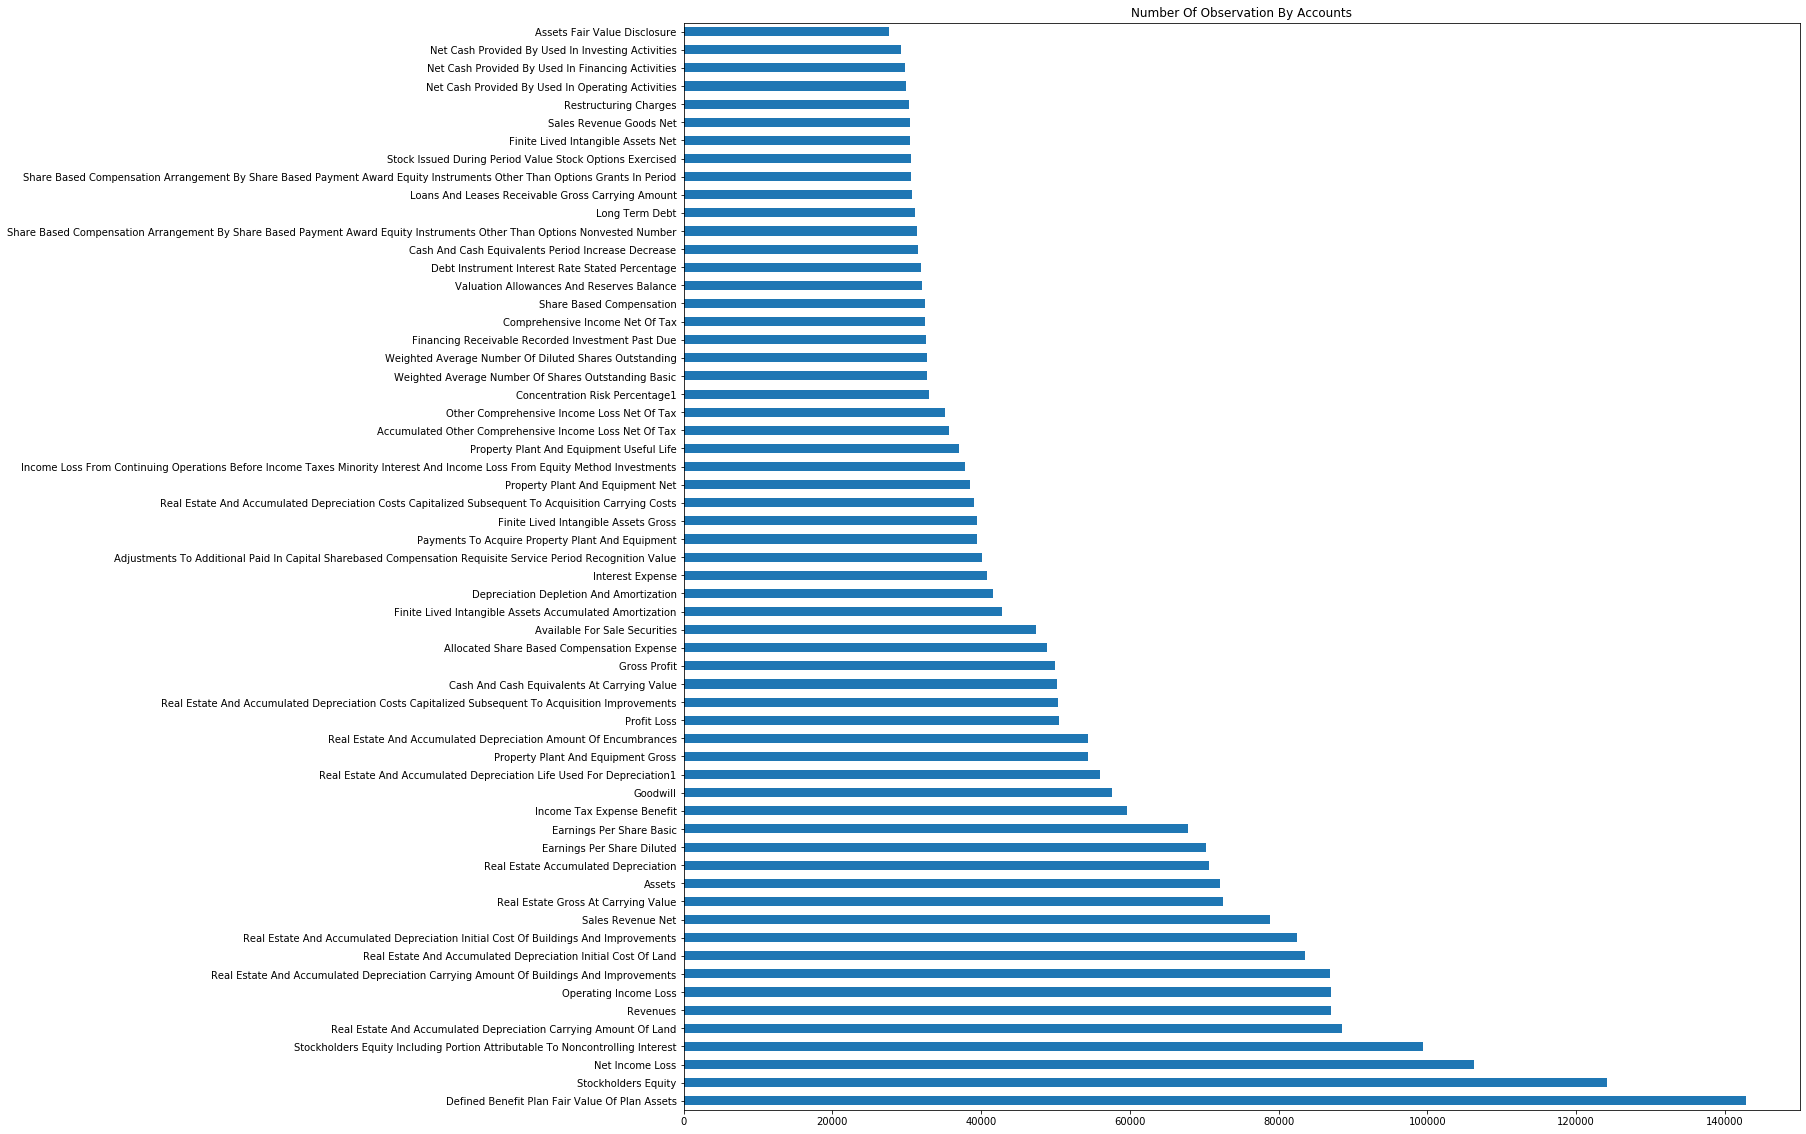

In [6]:
df['name'].value_counts()[:60].plot.barh(
    figsize=(20, 20),
    title='Number Of Observation By Accounts'
);

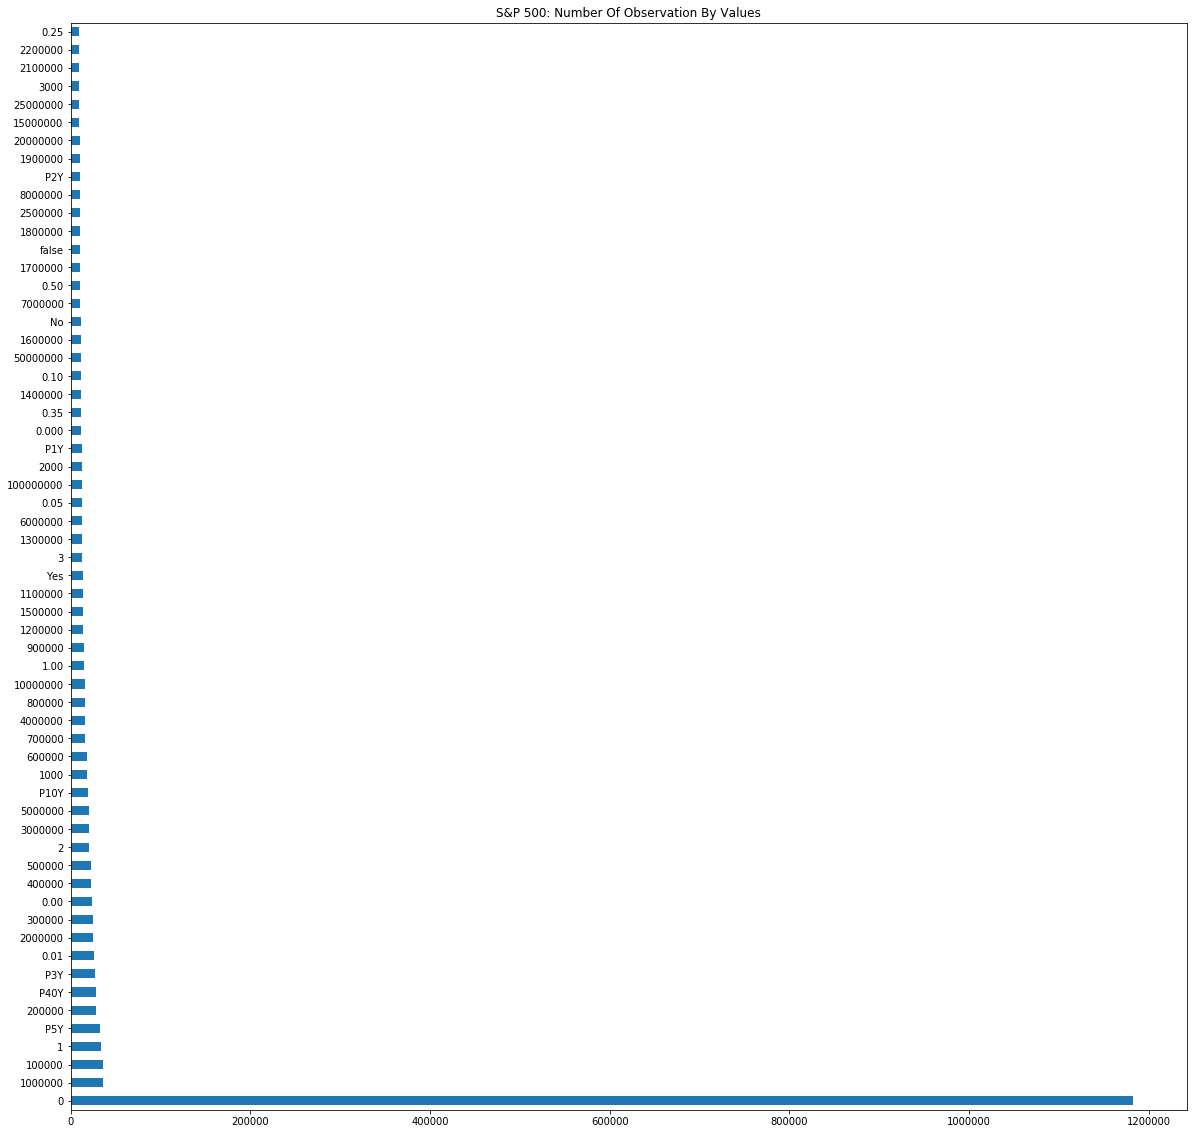

In [7]:
df['value'].value_counts()[:60].plot.barh(
    figsize=(20, 20),
    title='S&P 500: Number Of Observation By Values'
);

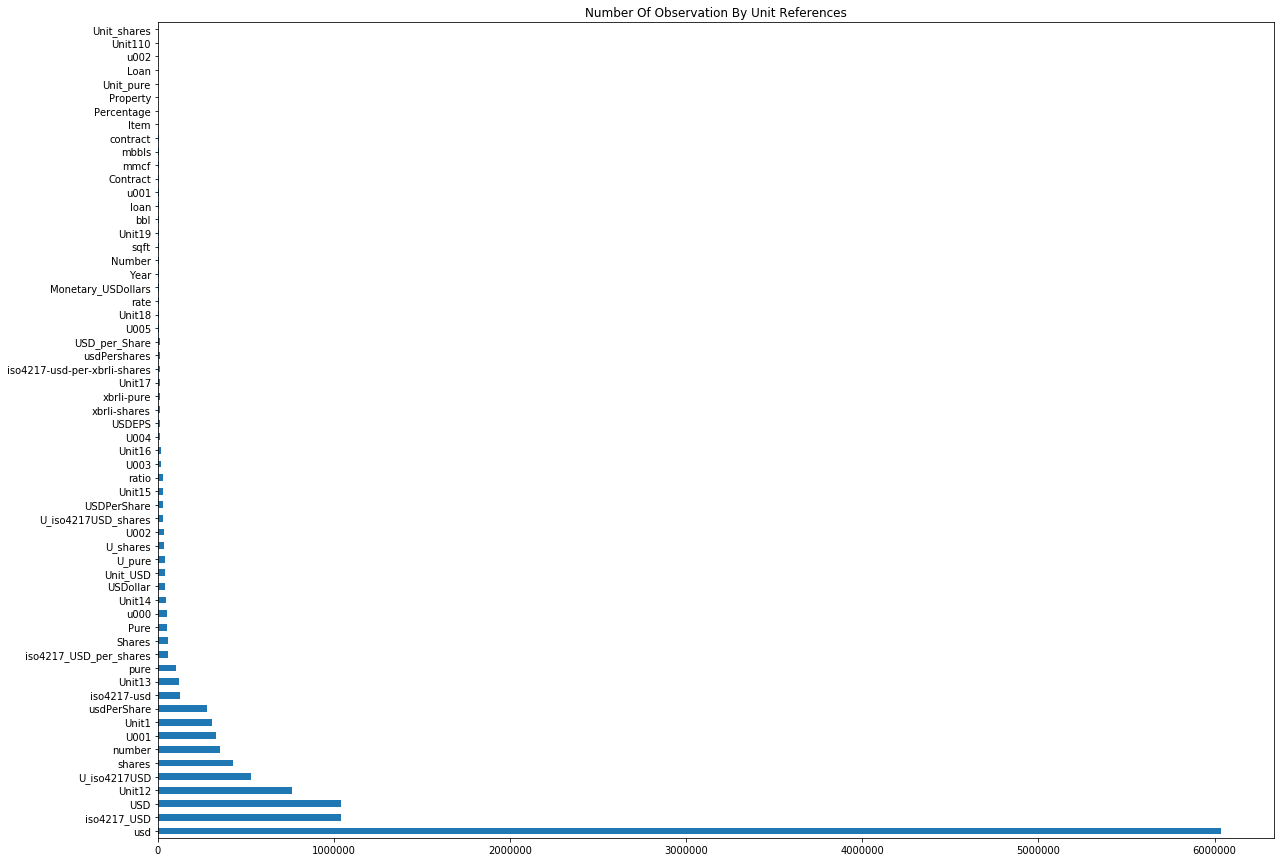

In [8]:
df['unit_ref'].value_counts()[:60].plot.barh(
    figsize=(20, 15),
    title='Number Of Observation By Unit References'
);

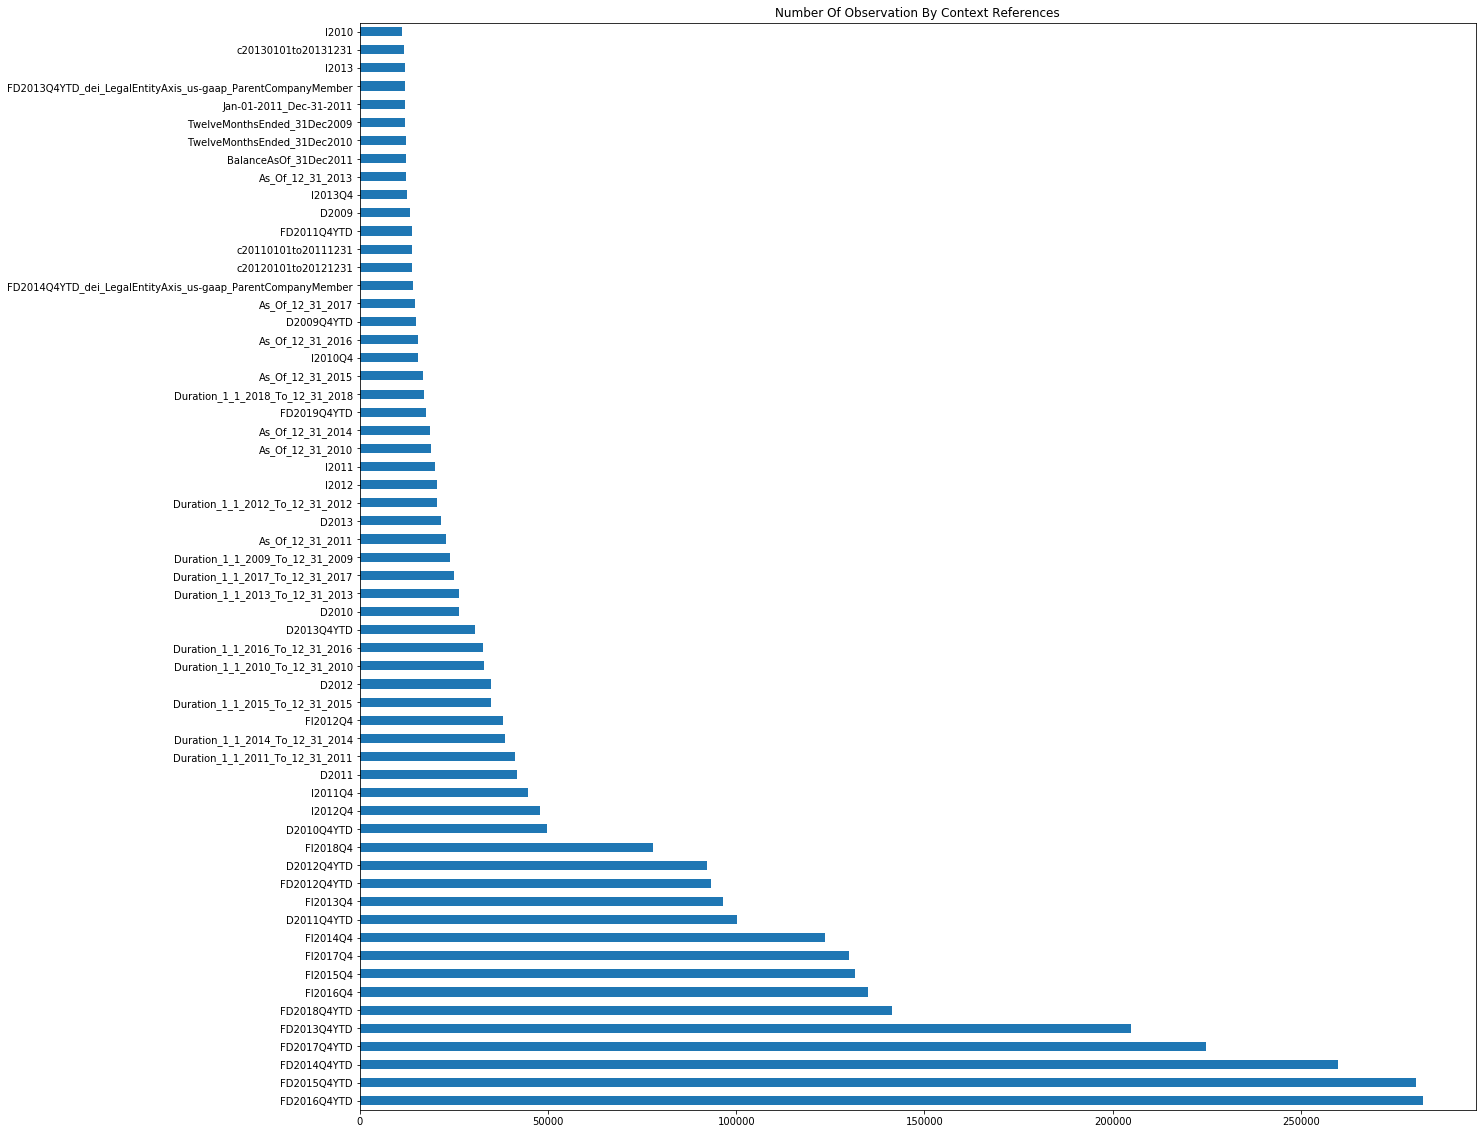

In [9]:
df['context_ref'].value_counts()[:60].plot.barh(
    figsize=(20, 20), 
    title='Number Of Observation By Context References'
);

---

In [10]:
df['year'] = df['context_ref'].str.extract(
    r'^F[DI](201\d)Q4(?:YTD)?$'
)

In [11]:
df = df[df['year'].notnull()]
df.drop_duplicates(('security', 'name', 'year'), inplace=True)

---

## Pivot The Data

Because we're creating a market cap classifier, we'll set up our pivot as follows:
1. The `security` and `year` will be the index
2. The `name` (Accounts) will be the column
3. The `value` will be the value

In [12]:
df['security_year'] = list(zip(df['security'], df['year']))

In [13]:
df = pd.pivot(df, index='security_year', columns='name', values='value')
df.dropna(axis=1, how='all', inplace=True)
df['security'] = [security for security, year in df.index]
df['year'] = [year for security, year in df.index]
df.reset_index(drop=True, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4918 entries, 0 to 4917
Columns: 60002 entries, A A C Note Securedby R M B S Securities Value Not Less Than to year
dtypes: object(60002)
memory usage: 2.2+ GB


---

## Export To `csv`

In [15]:
df.to_csv('../data/pivot_sp1000.csv', index=False)